In [1]:
import pandas as pd
purchase = pd.read_csv('purchase.csv')

In [2]:
purchase

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
from sklearn.preprocessing import StandardScaler
x = purchase[['Age', 'EstimatedSalary']]

sc_purchase = StandardScaler() # 평균값_분산
x_sc = sc_purchase.fit_transform(x)

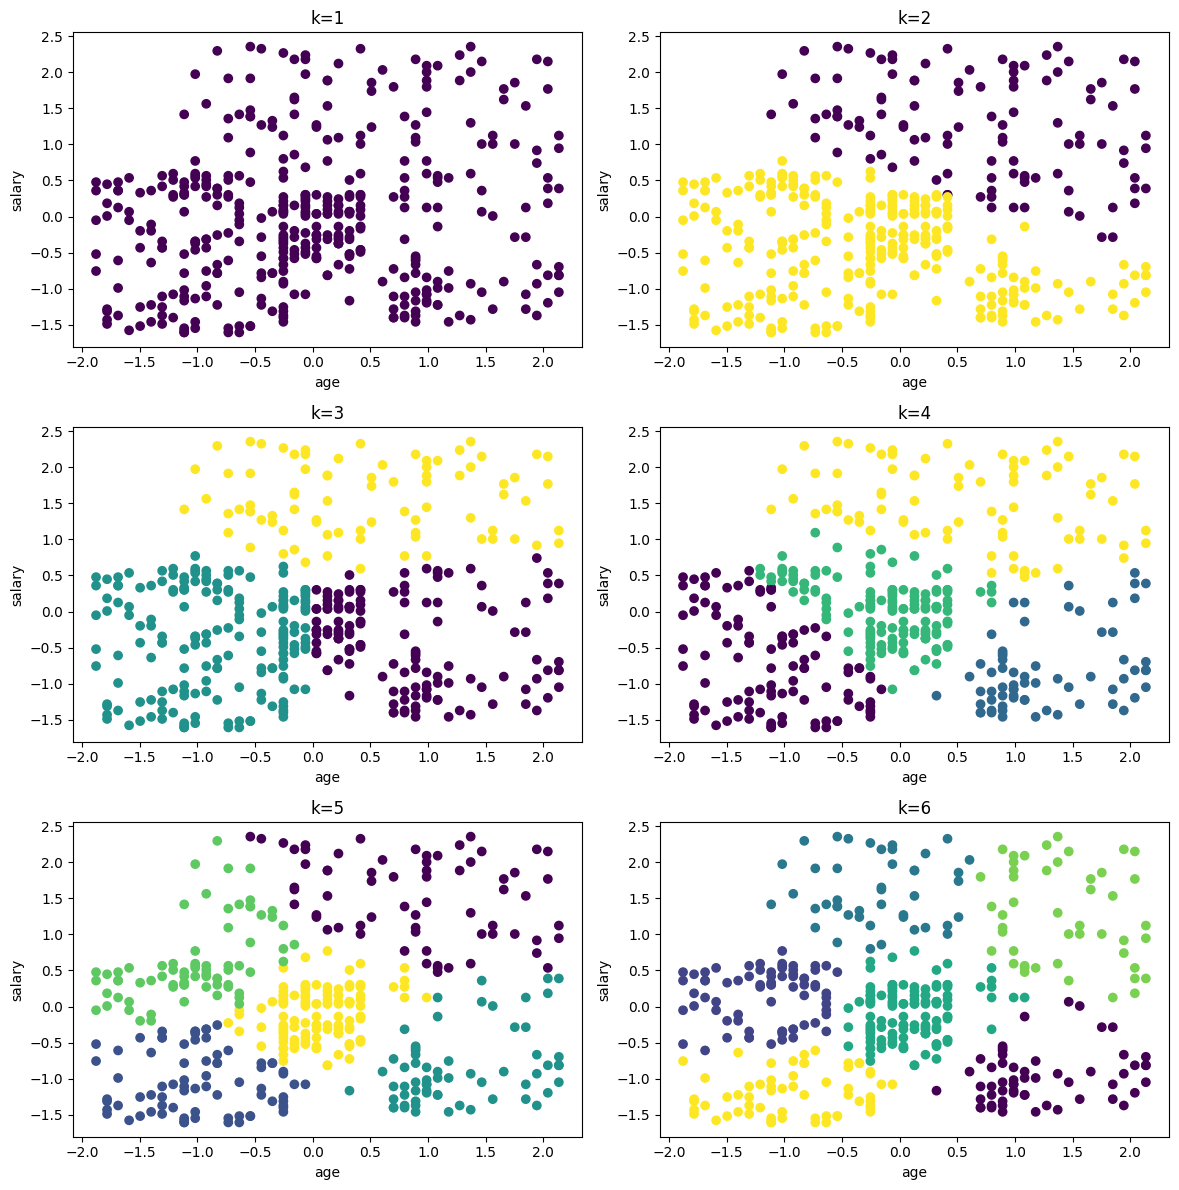

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

for k in range(1,7):
    km = KMeans(n_clusters = k)
    km.fit(x_sc)
    ids = km.predict(x_sc)

    plt.subplot(3,2,k)
    plt.tight_layout()

    plt.title(f'k={k}')
    plt.xlabel('age')
    plt.ylabel('salary')

    plt.scatter(x_sc[:,0], x_sc[:,1], c = ids)

plt.show()

In [6]:
k = 2
km_2 = KMeans(n_clusters = k)
km_2.fit(x_sc)

km_df_2 = purchase.copy()
ids = km_2.predict(x_sc)

km_df_2['cluster'] = ids
km_df_2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,cluster
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,0


In [10]:
km_df_2[km_df_2['Purchased'] == km_df_2['cluster']]

,User ID,Gender,Age,EstimatedSalary,Purchased,cluster
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,0
...,...,...,...,...,...,...
382,15715622,Female,44,139000,1,1
385,15775335,Male,56,60000,1,1
387,15627220,Male,39,71000,0,0
394,15757632,Female,39,59000,0,0


In [8]:
print(sum(km_df_2['Purchased'] == km_df_2['cluster']) / len(km_df_2))

0.8225
